In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [65]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

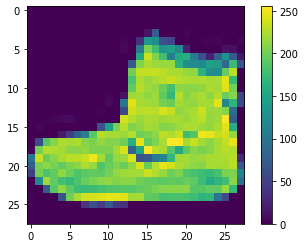

9


In [66]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[0])

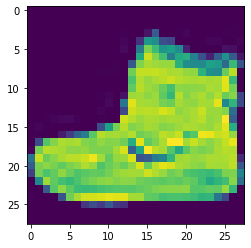

In [67]:
train_images=train_images/255
test_images=test_images/255
plt.figure()
plt.imshow(train_images[0])
#plt.colorbar()
plt.show()


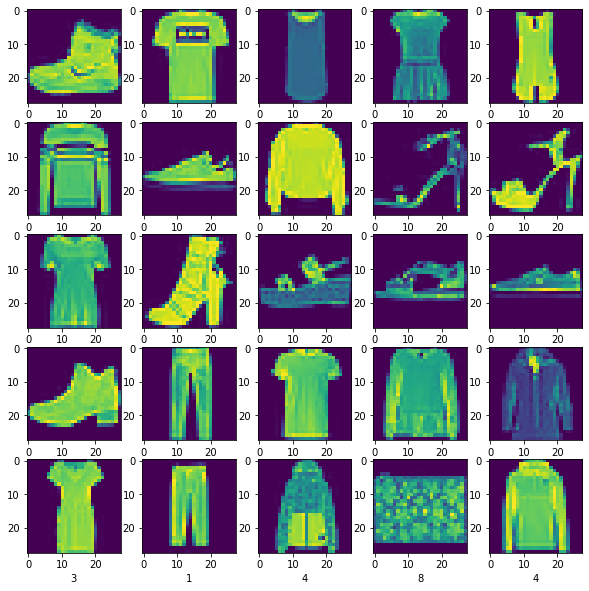

In [68]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

In [69]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10)])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.5006 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.3765 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.3369 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.3134 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.2947 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.2805 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 2s 926us/step - loss: 0.2681 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.2574 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.2460 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 2s 883u

In [72]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)

313/313 - 0s - loss: 0.3375 - accuracy: 0.8793 - 321ms/epoch - 1ms/step


In [73]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [74]:
predictions=probability_model.predict(test_images)

In [75]:
predictions[0]


array([4.3507319e-07, 2.2554325e-09, 3.6825029e-10, 4.8643239e-11,
       5.0756399e-10, 2.4166715e-04, 2.8279639e-09, 2.4304977e-02,
       1.9570101e-09, 9.7545290e-01], dtype=float32)

In [76]:
np.argmax(predictions[0])

9

In [77]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [78]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

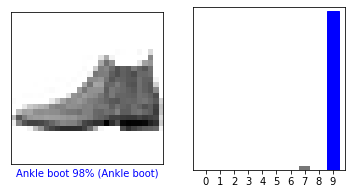

In [79]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

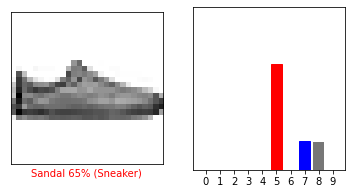

In [80]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()